In [1]:
import numpy as np
import cv2 as cv
import glob
import pickle
chessboardSize = (9,6)
frameSize = (640,480)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [2]:
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)
size_of_chessboard_squares_mm = 20
objp = objp * size_of_chessboard_squares_mm
objpoints = []
imgpoints = [] 


In [3]:
images = glob.glob('./images/*.png')

In [4]:
for image in images:

    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        plt.imshow('img', img)
        cv.waitKey(1000)


cv.destroyAllWindows()



In [5]:
ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)
pickle.dump((cameraMatrix, dist), open( "calibration.pkl", "wb" ))
pickle.dump(cameraMatrix, open( "cameraMatrix.pkl", "wb" ))
pickle.dump(dist, open( "dist.pkl", "wb" ))


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\calibration.cpp:3752: error: (-215:Assertion failed) nimages > 0 in function 'cv::calibrateCameraRO'


In [ ]:

img = cv.imread('cali5.png')
h,  w = img.shape[:2]
newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))
dst = cv.undistort(img, cameraMatrix, dist, None, newCameraMatrix)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('caliResult1.png', dst)
mapx, mapy = cv.initUndistortRectifyMap(cameraMatrix, dist, None, newCameraMatrix, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('caliResult2.png', dst)
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error

print( "total error: {}".format(mean_error/len(objpoints)) )


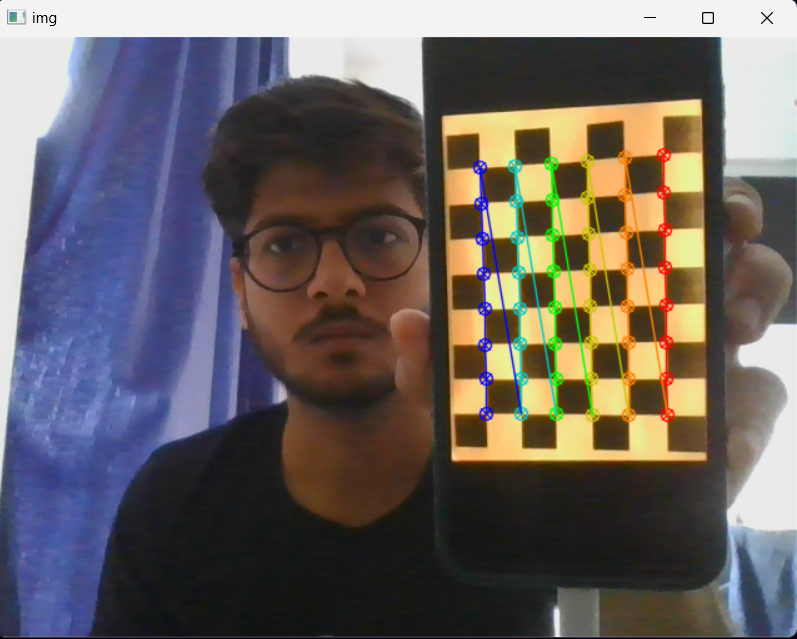

In [8]:
! pip install tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\tanma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
from tabulate import tabulate

# Define the loaded objects
dist = np.array([[-6.52703248e-01, 1.03766614e+01, -1.62762604e-02, -1.22276035e-02, -5.46258448e+01]])
cam_matrix = np.array([[808.22872327, 0., 349.59296448],
                        [0., 779.10651031, 225.86844321],
                        [0., 0., 1.]])
calibration = (np.array([[808.22872327, 0., 349.59296448],
                         [0., 779.10651031, 225.86844321],
                         [0., 0., 1.]]),
               np.array([[-6.52703248e-01, 1.03766614e+01, -1.62762604e-02,
                          -1.22276035e-02, -5.46258448e+01]]))

# Function to format matrix as table
def format_matrix(matrix):
    headers = [""] * matrix.shape[1]
    table = tabulate(matrix, headers=headers, tablefmt="fancy_grid", floatfmt=".2f")
    return table

# Display the matrices
print("dist matrix:")
print(format_matrix(dist))

print("\ncam_matrix:")
print(format_matrix(cam_matrix))

print("\ncalibration matrices:")
for matrix in calibration:
    print(format_matrix(matrix))


dist matrix:
╒═══════╤═══════╤═══════╤═══════╤════════╕
│       │       │       │       │        │
╞═══════╪═══════╪═══════╪═══════╪════════╡
│ -0.65 │ 10.38 │ -0.02 │ -0.01 │ -54.63 │
╘═══════╧═══════╧═══════╧═══════╧════════╛

cam_matrix:
╒════════╤════════╤════════╕
│        │        │        │
╞════════╪════════╪════════╡
│ 808.23 │   0.00 │ 349.59 │
├────────┼────────┼────────┤
│   0.00 │ 779.11 │ 225.87 │
├────────┼────────┼────────┤
│   0.00 │   0.00 │   1.00 │
╘════════╧════════╧════════╛

calibration matrices:
╒════════╤════════╤════════╕
│        │        │        │
╞════════╪════════╪════════╡
│ 808.23 │   0.00 │ 349.59 │
├────────┼────────┼────────┤
│   0.00 │ 779.11 │ 225.87 │
├────────┼────────┼────────┤
│   0.00 │   0.00 │   1.00 │
╘════════╧════════╧════════╛
╒═══════╤═══════╤═══════╤═══════╤════════╕
│       │       │       │       │        │
╞═══════╪═══════╪═══════╪═══════╪════════╡
│ -0.65 │ 10.38 │ -0.02 │ -0.01 │ -54.63 │
╘═══════╧═══════╧═══════╧═══════╧════════╛